# Desarrollo tarea 1
## Materia Visión de máquina, maestría en ingeniería electrónica
## Presentada por Juan Daniel Sarmiento Abello 
## CC 1000331954

In [76]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline #construir los objetos de interpolación dadas las matrices de datos, xy y, 

## 1. Principales técnicas de interpolación
## Impleteación y evaluación 

## Imagen utilizada

Reutilizo una imagen del radar de apertura sintetica Sentinel correspondiente al embalse de tominé y se recorto a un tamaño de 378 × 413 píxeles

In [81]:
#Lectura de la imagen
imgSpk = cv2.imread('Spk.png')
tamaño = imgSpk.shape
tipo = imgSpk.dtype
print('tamaño y tipo',tamaño,tipo)

tamaño y tipo (451, 378, 3) uint8


![Spk.png](Spk.png)

### 1.1 Vecino más cercano 

Este método consiste en aproximar el valor de un píxel de salida, dado un píxel de entrada cuya cercanía es la más próxima posible, en dirección inversa. Para lograr esto, se distorsiona la imagen original  mediante ecuaciones de distorsión como: 

\begin{equation}
        x^{'} = r(x,y) = c_1x + c_2y + c_3xy + c_4\\
        y^{'} = s(x,y) = c_5x + c_6y + c_7xy + c_8
    \end{equation}
    
Las ecuaciones de distorsión generan píxeles en nuevas coordenadas donde se evaluarán los más cercanos al píxel original y finalmente se le asignará un valor de gris.
Este metodo anuque relativmente sencillo de utilizar puede generar distorsión de líneas en imágenes y producir
un error espacial relativo de $\frac{1}{\sqrt{2}}$.

El siguiente código utiliza la función $cv2.resize$ con un factor de 1.5 para obtener la interpolación del vecino más cercano.

In [82]:
ImgIterpolacion_M1 = cv2.resize(imgSpk, None,fx=1.5, fy=1.5, interpolation = cv2.INTER_NEAREST)

In [83]:
cv2.imwrite("Interpolacion_Ve.png", ImgIterpolacion_M1)

True

![Spk.png](Spk.png),![Interpolacion_Ve.png](Interpolacion_Ve.png)

Figura 1 Imagen superior original, imagen inferior aplicando interpolación con vecinos mas cercanos.
El nuveo tamaño de la imgen es:

Este método de interpolación presenta una imagen con un relativo alto nivel de distorsión debido a que el valor de un píxel de salida puede tener valores numéricos con una alta diferencia respecto de su vecino más cercano

In [84]:
img = cv2.imread('Interpolacion_Ve.png')
tamaño2 = img.shape
print('Tamaño',tamaño2)

Tamaño (676, 567, 3)


In [ ]:
Este metodo de interpolasion 

### 1.2 Interpolación Bilineal

Este método considera los cuatro vecinos más cercanos de un píxel en la imagen original para asignar un valor al píxel de salida. Esto lo hace calculando el promedio de los cuatro píxeles para llegar al valor interpolado. Con este método se obtienen bordes más suavizados pero a costa de mayores recursos computacionales. 

In [85]:
ImgIterpolacion_M2 = cv2.resize(imgSpk, None,fx=1.5, fy=1.5, interpolation = cv2.INTER_LINEAR)
cv2.imwrite("Interpolacion_Bi.png", ImgIterpolacion_M2)

True

![Spk.png](Spk.png),![Interpolacion_Bi.png](Interpolacion_Bi.png)

Figura 2. Imagen superior original, imagen inferior aplicando interpolación Bilineal.

Este método utiliza los cuatro vecinos más cercanos a un píxel de entrada por lo  que  obtiene un promedio de los valores numéricos que lo rodean. Esto le permite tener mejores resultados como se muestra en la figura.

In [86]:
img = cv2.imread('Interpolacion_Bi.png')
tamaño3 = img.shape
print('Tamaño',tamaño3)

Tamaño (676, 567, 3)


### 1.3 Interpolación Bicubica.

Este método utiliza los ocho vecinos más cercanos para realizar la interpolación. La interpolación bicúbica calcula el valor en los píxeles de salida en una imagen de baja resolución ajustando un poliomielitis de tercer orden, $f_i(x)$, entre dos píxeles vecinos ( $x_i$ y $x_{i + 1}$).
El polinomio de tercer orden se desribe como:

\begin{equation}
        f_i(x) = a_i+b_i(x-x_i)+c_i(x-x_i)^{2}+d_i(x-x_i)^{3}
    \end{equation}
    
Donde x es la ubicación espacial del valor de píxel que se interpola y normalmente está a medio camino entre $x_i$  y  $x_{i+1}$.

In [87]:
ImgIterpolacion_M3 = cv2.resize(imgSpk, None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
cv2.imwrite("Interpolacion_Bic.png", ImgIterpolacion_M3)

True

![Spk.png](Spk.png),![Interpolacion_Bic.png](Interpolacion_Bic.png)

Figura 3. Imagen superior original, imagen inferior aplicando interpolación bicúbica.

Este método permite mejorar aún más la imagen debido a que el píxel de entrada promedia los valores de sus ocho vecinos más cercanos permitiendo obtener mejores resultados que la interpolación por el método bilineal 

In [88]:
img = cv2.imread('Interpolacion_Bic.png')
tamaño4 = img.shape
print('Tamaño',tamaño4)

Tamaño (676, 567, 3)


En el siguiente código se puede detallar la diferencia entre las interpolaciones

### 1.4 Interpolación  B-splines

Las B-splines son un conjunto ponderado de funciones básicas para splines polinomiales[1].
Permiten devolver un vector para su posterior interpolacion. La función $B-spline$ puede crear una spline lineal, cuadrática o cúbica.
La interpolación B-spline le permite trazar una curva por un conjunto de puntos tomando tres puntos adyacentes y creando un polinomio de grado n que pase por tales puntos. Estos polinomios se unen en los nudos para formar la curva completa.
Continicion se muestra un ejemplo de uso del metodo B-spline.  

In [66]:
from scipy.interpolate import make_interp_spline
bspl = make_interp_spline(x, y, k=3)

Ref 'Interpolacion B-spline. Tomado de https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html#interpolation-with-b-splines

In [67]:
def B_Splines(x,y):
    bspl = make_interp_spline(x, y, k=3)
    der = bspl.derivative()      # a BSpline representing the derivative
    xx = np.linspace(0, 3/2, 51)
    plt.plot(xx, bspl(xx), '--', label=r'$f(x)$ approx')
    plt.plot(x, y, 'o', label='data')
    plt.plot(xx, der(xx)/np.pi, '--', label='$d f(x)/dx$ approx')
    plt.legend()
    plt.show()

Ingrese una función matematica de la forma $f(x)=a_{n-1}x^{n}+a_{n-1}x^{n-1}+...+a_{3}x^{3}+a_{2}x^{2}+a_{1}x+a_{0}$

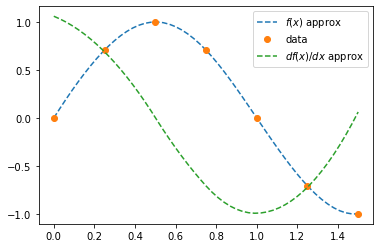

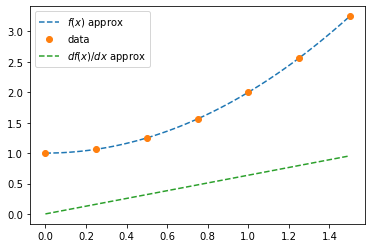

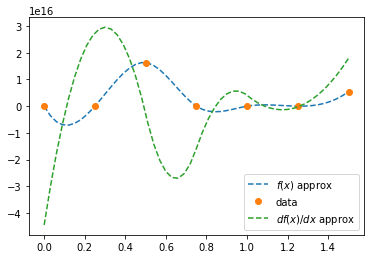

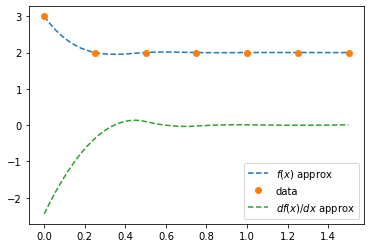

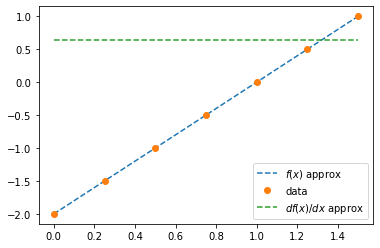

In [71]:
x = np.linspace(0, 3/2, 7)
y = np.sin(np.pi*x)
B_Splines(x,y)


x = np.linspace(0, 3/2, 7)
y = (x*x)+1
B_Splines(x,y)


x = np.linspace(0, 3/2, 7)
y = np.tan(np.pi*x)
B_Splines(x,y)


x = np.linspace(0, 3/2, 7)
y = ((2*x)+3)//(x+1)
B_Splines(x,y)

x = np.linspace(0, 3/2, 7)
y = 2*x-2
B_Splines(x,y)

Se puede ver cómo a partir de una serie de puntos la interpolación $B-Spline$ aproxima aproxima la función con una alta precisión, este método es muy utilizado  para para la detección de relieves sin embargo, cuando la imagen cuenta con un alto contenido en relieve este método puede perder precisión

## 3. Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada

La siguiente función rota una imagen ña cantidad de grados descritos por el usuario. Los parámetros de entrada son la cantidad de grados y  la imagen.

In [90]:
def RotacionImagen(Angulo,imagen):

    Alto, Ancho = imagen.shape[:2]
    Centro = (Ancho/2, Alto/2)  
    rotate_matrix = cv2.getRotationMatrix2D(center=Centro, angle=Angulo, scale=1)  
    rotated_image = cv2.warpAffine(src=imagen, M=rotate_matrix, dsize=(Ancho, Alto)) 
    rotated_imageIp = cv2.resize(rotated_image, None,fx=1, fy=1, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Imagen Rotada con interpolacion", rotated_imageIp)
    cv2.imshow('Imagen Original', imagen)
    cv2.waitKey(0)
    cv2.destroyAllWindows()  


In [93]:
imagen = cv2.imread('Spk.png')
Angulo = 18
RotacionImagen(Angulo, imagen)